# Ensemble Techniques Project 
## Parkinson Disease Classification 
### Alok Sawant 

### Importing libraries 

In [2]:
import pandas as pd 
import numpy as np
from sklearn import svm 
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import svm

from sklearn import metrics
from scipy.stats import zscore

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.metrics import roc_curve, auc


### Function to calculate accuracy 

In [3]:
def getAccuracy(testSet, predictions):
        correct = 0
        for x in range(len(testSet)):
            if testSet[x] == predictions[x]:
                correct += 1
        return (correct/float(len(testSet)))*100.0

### Importing data 

In [4]:
data = pd.read_csv("data.csv")

In [5]:
data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [5]:
data.shape

(195, 24)

Data set contains 195 rows and 24 coloumns

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

Data set contains one coloumn with object and rest are numerical values

In [7]:
data.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

The given dataset contains no null values

In [8]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


In [9]:
data.skew()

MDVP:Fo(Hz)         0.591737
MDVP:Fhi(Hz)        2.542146
MDVP:Flo(Hz)        1.217350
MDVP:Jitter(%)      3.084946
MDVP:Jitter(Abs)    2.649071
MDVP:RAP            3.360708
MDVP:PPQ            3.073892
Jitter:DDP          3.362058
MDVP:Shimmer        1.666480
MDVP:Shimmer(dB)    1.999389
Shimmer:APQ3        1.580576
Shimmer:APQ5        1.798697
MDVP:APQ            2.618047
Shimmer:DDA         1.580618
NHR                 4.220709
HNR                -0.514317
status             -1.187727
RPDE               -0.143402
DFA                -0.033214
spread1             0.432139
spread2             0.144430
D2                  0.430384
PPE                 0.797491
dtype: float64

## Observaations in dataset 

There is no missing value or null value in data set
The column with feature 'name' has no relation with 'status' hence can be dropped. 
All other features in the dataset are numerical values
The gap between the values of different feature is quite high and hence needs to be rescaled. 
Most of the features in the given data set are skewed. 

## Univariate analysis of data

In [10]:
data.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

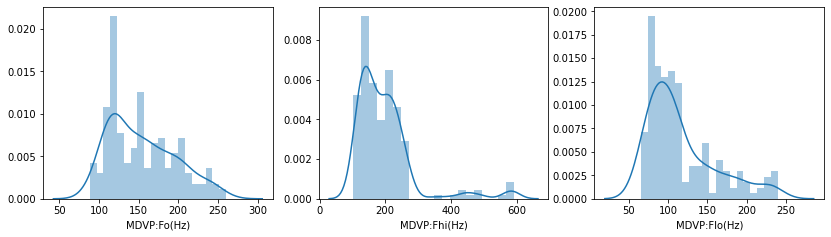

In [11]:
## Analysis of fundamental frequency 
col= [ 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)'] 
i=3
j=0
plt.figure(figsize=(14,12))
for k in col :
    plt.subplot(i,i,i*(j+1)//i)
    sns.distplot(data[k], bins=20)
    j=j+1
plt.show()

The average vocal fundamental frequency is almost normally distributed with most values ranging in between 100Hz to 150Hz. The maximum vocal fundamental frequency is positively skewed and values raging in between 100Hz to 250Hz. The minimum vocal fundamental frequency is also positively skewed with most values ranging in between 75Hz to 125 Hz. 

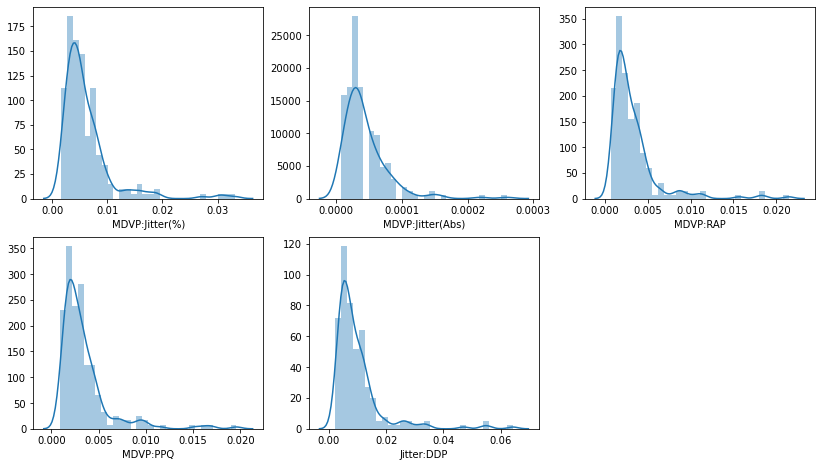

In [12]:
## Analysis  of measures of variation in fundamental frequency 
col= [ 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP'] 
i=3
j=0
plt.figure(figsize=(14,12))
for k in col :
    plt.subplot(i,i,i*(j+1)//i)
    sns.distplot(data[k], bins=30)
    j=j+1
plt.show()

While anlaysing measure of variance in fundamental frequency above plots shows that almost all of the data is positively skewed and shows similar trend in distribution.

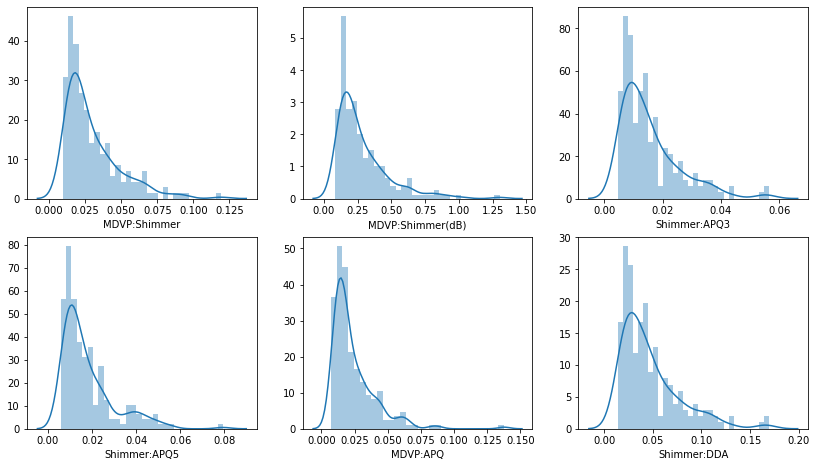

In [13]:
## Analysis  of variation in amplitude
col= ['MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA'] 
i=3
j=0
plt.figure(figsize=(14,12))
for k in col :
    plt.subplot(i,i,i*(j+1)//i)
    sns.distplot(data[k], bins=30)
    j=j+1
plt.show()

The above plots shows univariate analysis of variation in amplitude. The plot shows that most of the data shows similar trend in distribution and is positively skewed. 

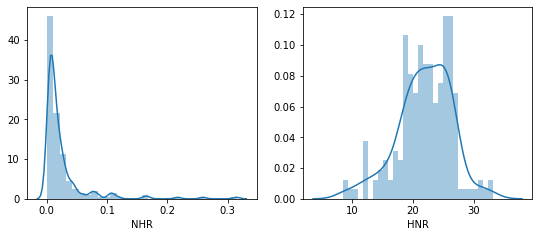

In [14]:
## Analysis  of measures of ratio of noise to tonal components in the voice
col= ['NHR', 'HNR'] 
i=3
j=0
plt.figure(figsize=(14,12))
for k in col :
    plt.subplot(i,i,i*(j+1)//i)
    sns.distplot(data[k], bins=30)
    j=j+1
plt.show()

The aboive plots shows analysis of ratio of noise to tonal components in the voice. Here, NHR is highly positively skewed and 'HNR' is slightly negetively skewed.

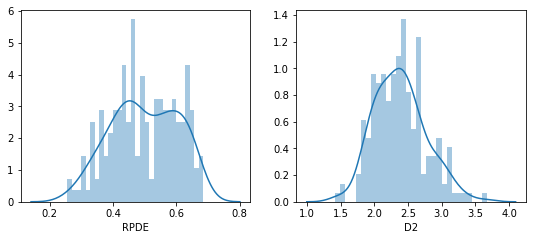

In [15]:
## Analysis  of nonlinear dynamical complexity measures
col= ['RPDE', 'D2'] 
i=3
j=0
plt.figure(figsize=(14,12))
for k in col :
    plt.subplot(i,i,i*(j+1)//i)
    sns.distplot(data[k], bins=30)
    j=j+1
plt.show()

The above plots shows that both 'RPDE' and 'D2' plots tends to be normally distributed.

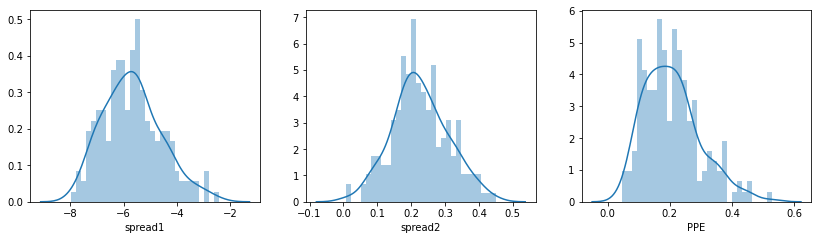

In [16]:
## Analysis  of nonlinear measures of fundamental frequency variation 
col= ['spread1', 'spread2','PPE'] 
i=3
j=0
plt.figure(figsize=(14,12))
for k in col :
    plt.subplot(i,i,i*(j+1)//i)
    sns.distplot(data[k], bins=30)
    j=j+1
plt.show()

The above plots shows analysis of nonlinear measures of fundamental frequency variations. All of the plots above shows 
normal distributions with few outliers. 

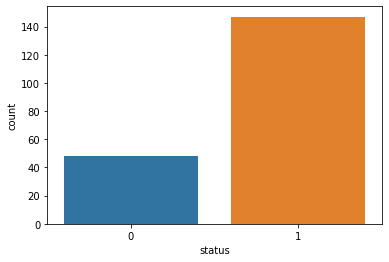

In [17]:
## Variation of target variable
sns.countplot(data['status'])

In the given dataset most of the people (75%) have Perkinson's disease. 

## Bi-variate analysis

As number of columns are more, it would take lot of graphs to analyse each feature with the target variable.  Insted first will find most correlated columns with target variable and then perform bi-variate analysis. 

In [18]:
corr = data.corr()
corr

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,...,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MDVP:Fhi(Hz),0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,...,-0.003733,0.163766,-0.024893,-0.166136,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
MDVP:Flo(Hz),0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,...,-0.150737,-0.108670,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
MDVP:Jitter(%),-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,...,0.746635,0.906959,-0.728165,0.278220,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
MDVP:Jitter(Abs),-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,...,0.697170,0.834972,-0.656810,0.338653,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
MDVP:RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,...,0.744919,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MDVP:PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,...,0.763592,0.844604,-0.731510,0.288698,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
Jitter:DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,...,0.744901,0.919548,-0.721494,0.266646,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
MDVP:Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,...,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MDVP:Shimmer(dB),-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,...,0.963202,0.744477,-0.827805,0.350697,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


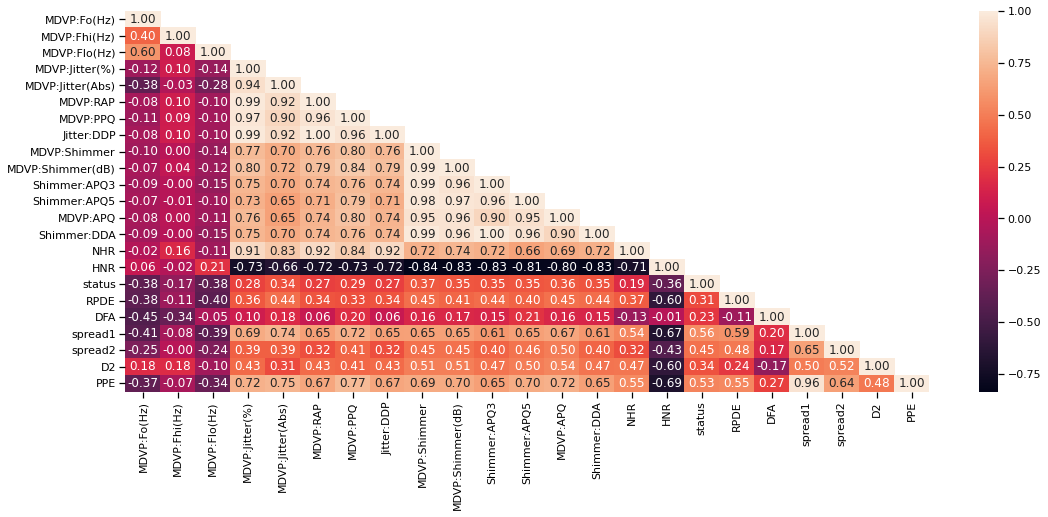

In [19]:
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 3.5})
plt.figure(figsize=(18,7))
# create a mask so we only see the correlation values once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
datax = a.set_xticklabels(a.get_xticklabels(), rotation=90)
datay = a.set_yticklabels(a.get_yticklabels())

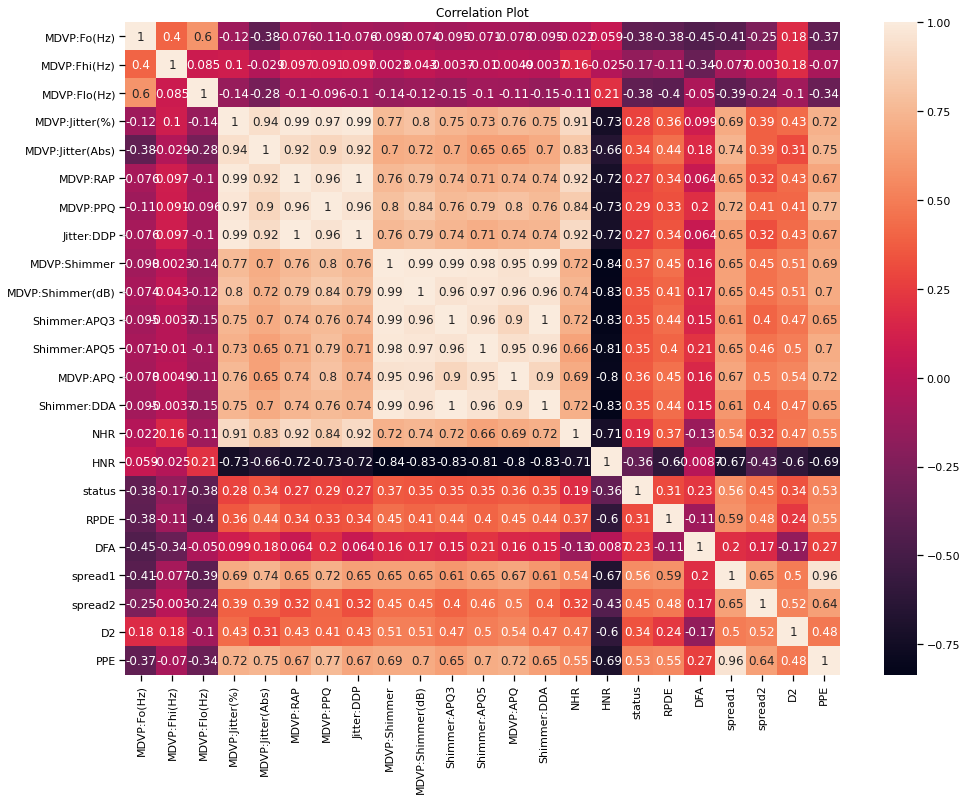

In [20]:
# Plotting corelations using heatmap

plt.figure(figsize=(16,12))
plt.title("Correlation Plot")
sns.heatmap(corr, annot=True)
plt.show()

Above plot shows that MDVP:Jitter(%) is highly correlated (above +90%) with Jitter(Abs),MDVP:RAP,MDVP:PPQ,NHR. 

HNR is highly correlated (above -80%) with MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA. 

MDVP:Shimmer is highly correlated with MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA


Text(0.5, 1.0, 'Variation of Spread1 with Status')

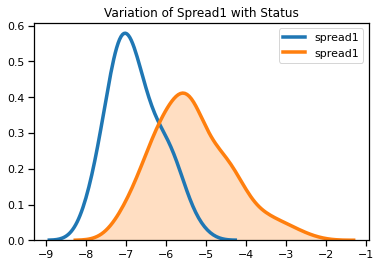

In [21]:
#variation of Spread1 with Target Variable
sns.kdeplot(data[data.status == 0]['spread1'], shade=False,)
sns.kdeplot(data[data.status == 1]['spread1'], shade=True)
plt.title("Variation of Spread1 with Status")

People with spred1 between -6.5 and -5 have more chance of having Perkinson however, people with spread1 between -9.5 and -7.5 have more chance of not having Perkinson. 

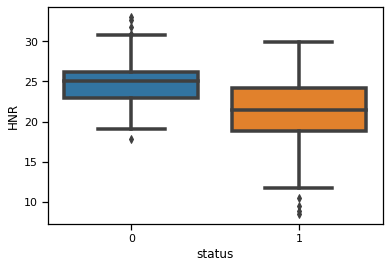

In [22]:
#variation of HNR with Target Variable, MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,
# MDVP:APQ,Shimmer:DDA are not considered as they are highly correlatedwith NHR 
sns.boxplot(x='status',y='HNR',data=data)

People with Perkinson have higher levels of noise to tonal components in the voice 

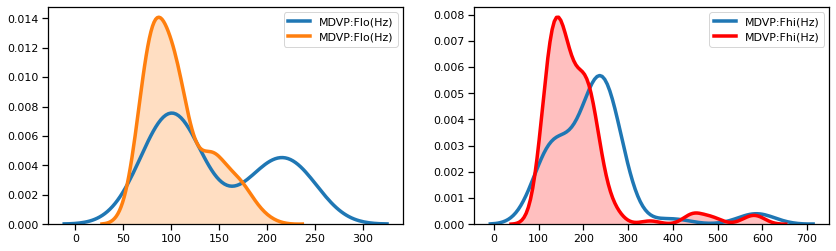

In [23]:
#variation of  Maximum, Minimum vocal fundamental frequency
fig, ax = plt.subplots(1,2,figsize=(14,4))
sns.kdeplot(data[data.status == 0]['MDVP:Flo(Hz)'], shade=False,ax=ax[0])
sns.kdeplot(data[data.status == 1]['MDVP:Flo(Hz)'], shade=True,ax=ax[0])

sns.kdeplot(data[data.status == 0]['MDVP:Fhi(Hz)'], shade=False,ax=ax[1])
sns.kdeplot(data[data.status == 1]['MDVP:Fhi(Hz)'], shade=True,color='r',ax=ax[1])

People with minimum vocal frequency above 250Hz tends to not having Perkinson. People with maximum vocal frequency from 100 - 200 HZ are more likely to have Perkinson. 

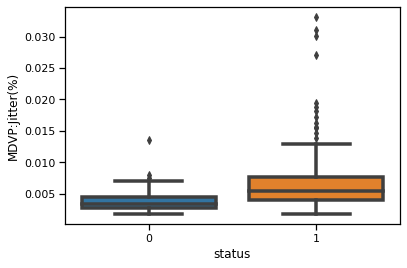

In [24]:
#variation of MDVP:Jitter(%) with Target Variable, will not consider Jitter(Abs),MDVP:RAP,MDVP:PPQ,NHR as they are highly correlatedwith NHR 
sns.boxplot(x='status',y='MDVP:Jitter(%)',data=data)


Text(0.5, 1.0, 'Variation of MDVP:Jitter(%) with Status')

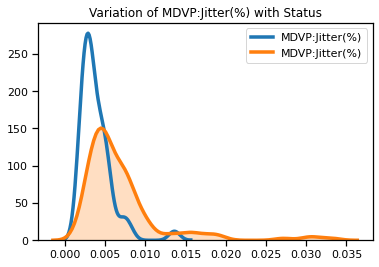

In [25]:
#variation of Spread1 with Target Variable
sns.kdeplot(data[data.status == 0]['MDVP:Jitter(%)'], shade=False,)
sns.kdeplot(data[data.status == 1]['MDVP:Jitter(%)'], shade=True)
plt.title("Variation of MDVP:Jitter(%) with Status")

People with MDVP:jitter(%) value is >0.005 more likely to have Parkinson.

## Splitting data in test and training set

In [26]:
#Split the data into training and test set in the ratio of 70:30 respectively
X = data.drop(['status','name'],axis=1)
y = data['status']

# split data into train subset and test subset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

print(X_train.shape)
print(X_test.shape)

(136, 22)
(59, 22)


In [27]:
#checking the variance 
#high variance means fearure does not affect the target variable
X_train.var()

MDVP:Fo(Hz)         1.744818e+03
MDVP:Fhi(Hz)        7.726066e+03
MDVP:Flo(Hz)        2.018009e+03
MDVP:Jitter(%)      2.117029e-05
MDVP:Jitter(Abs)    1.233427e-09
MDVP:RAP            8.129439e-06
MDVP:PPQ            6.477595e-06
Jitter:DDP          7.317514e-05
MDVP:Shimmer        3.075943e-04
MDVP:Shimmer(dB)    3.001363e-02
Shimmer:APQ3        9.606286e-05
Shimmer:APQ5        1.202009e-04
MDVP:APQ            1.953454e-04
Shimmer:DDA         8.645573e-04
NHR                 1.602961e-03
HNR                 1.737357e+01
RPDE                1.052263e-02
DFA                 3.032206e-03
spread1             1.090529e+00
spread2             5.837355e-03
D2                  1.197875e-01
PPE                 7.620135e-03
dtype: float64

In [28]:
#dropping correlated values which are have either more then 80% or less then -80%
X_train.drop(['MDVP:Shimmer','MDVP:Jitter(%)','HNR'],axis=1,inplace=True)
X_test.drop(['MDVP:Shimmer','MDVP:Jitter(%)','HNR'],axis=1,inplace=True)

/Users/Alok/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [30]:
#scaling features, since there is lots of variety in the units of features
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(X_train)
scaler_x_train=scaler.transform(X_train)

scaler=StandardScaler().fit(X_test)
scaler_x_test=scaler.transform(X_test)

## Model Building

### Logistic Regression 

In [92]:
# Train and Fit model
model = LogisticRegression(random_state=0)
model.fit(scaler_x_train, y_train)

LogisticRegression(random_state=0)

In [93]:
predicted_labels = model.predict(scaler_x_test)
model.score(scaler_x_test, y_test)

0.7966101694915254

In [94]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(y_test,predicted_labels)

array([[ 7,  5],
       [ 7, 40]])

Confusion Matrix


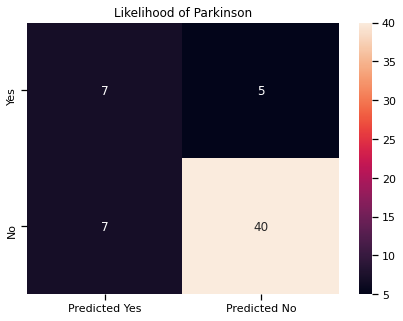

In [95]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics

print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, predicted_labels)

data_cm = pd.DataFrame(cm, index = [i for i in ["Yes","No"]],
                  columns = [i for i in ["Predicted Yes","Predicted No"]])
plt.figure(figsize = (7,5))
plt.title("Likelihood of Parkinson")
sns.heatmap(data_cm, annot=True)

In [96]:
cr=classification_report(y_test, predicted_labels, digits=2)
print(cr)

              precision    recall  f1-score   support

           0       0.50      0.58      0.54        12
           1       0.89      0.85      0.87        47

    accuracy                           0.80        59
   macro avg       0.69      0.72      0.70        59
weighted avg       0.81      0.80      0.80        59



### Model Performance (Logistic Regression)

* Accuracy - 80% 

* Re-call - 85%

* Precision - 89%

* F1-Score - 87%

Since there is class imbalance in this case (i.e target variable is 75% to 25%), F1-Score F1-score is a better metric to evaluate model.

### KNN model

In [97]:
NNH = KNeighborsClassifier( weights = 'distance' )
NNH.fit(scaler_x_train, y_train)

KNeighborsClassifier(weights='distance')

In [98]:
predicted_labels = NNH.predict(scaler_x_test)
NNH.score(scaler_x_test, y_test)

0.8305084745762712

In [99]:
confusion_matrix(y_test,predicted_labels)

array([[ 8,  4],
       [ 6, 41]])

Confusion Matrix


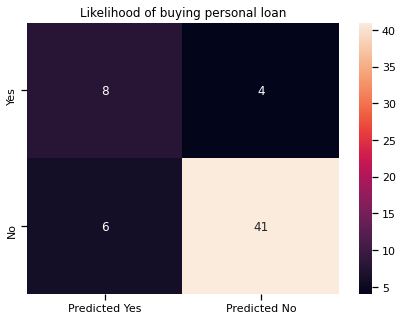

In [100]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics

print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, predicted_labels)

data_cm = pd.DataFrame(cm, index = [i for i in ["Yes","No"]],
                  columns = [i for i in ["Predicted Yes","Predicted No"]])
plt.figure(figsize = (7,5))
plt.title("Likelihood of buying personal loan")
sns.heatmap(data_cm, annot=True)

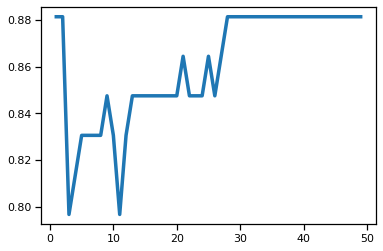

In [101]:
scores =[]
for k in range(1,50):
    NNH = KNeighborsClassifier(n_neighbors = k, weights = 'distance' )
    NNH.fit(scaler_x_train, y_train)
    scores.append(NNH.score(scaler_x_test, y_test))
plt.plot(range(1,50),scores)

The optimal value of K appears to be around 29

In [102]:
NNH = KNeighborsClassifier(n_neighbors = 29, weights = 'distance')
NNH.fit(scaler_x_train, y_train)
predicted_labels = NNH.predict(scaler_x_test)
NNH.score(scaler_x_test, y_test)

0.8813559322033898

Confusion Matrix


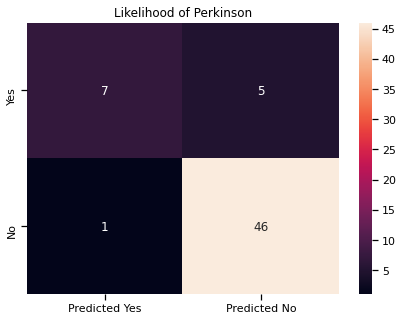

In [137]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics

print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, predicted_labels)

data_cm = pd.DataFrame(cm, index = [i for i in ["Yes","No"]],
                  columns = [i for i in ["Predicted Yes","Predicted No"]])
plt.figure(figsize = (7,5))
plt.title("Likelihood of Perkinson")
sns.heatmap(data_cm, annot=True)

In [138]:
cr=classification_report(y_test, predicted_labels, digits=2)
print(cr)

              precision    recall  f1-score   support

           0       0.88      0.58      0.70        12
           1       0.90      0.98      0.94        47

    accuracy                           0.90        59
   macro avg       0.89      0.78      0.82        59
weighted avg       0.90      0.90      0.89        59



### Model Performance (K-NN)

* Accuracy - 90% 

* Re-call - 98%

* Precision -90%

* F1-Score - 94%

Since there is class imbalance in this case (i.e target variable is 75% to 25%), F1-Score F1-score is a better metric to evaluate model.

### SVM model

In [139]:
clf = svm.SVC(gamma=0.025, C=3)   
clf.fit(scaler_x_train, y_train)
predicted_labels = clf.predict(scaler_x_test)
clf.score(scaler_x_test, y_test)

0.8983050847457628

Confusion Matrix


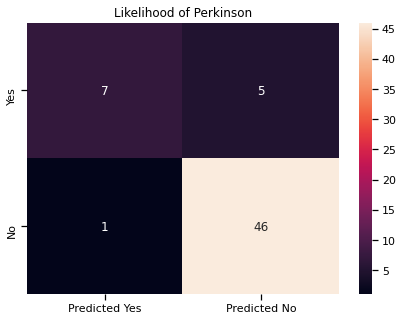

In [140]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics

print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, predicted_labels)

data_cm = pd.DataFrame(cm, index = [i for i in ["Yes","No"]],
                  columns = [i for i in ["Predicted Yes","Predicted No"]])
plt.figure(figsize = (7,5))
plt.title("Likelihood of Perkinson")
sns.heatmap(data_cm, annot=True)

In [141]:
cr=classification_report(y_test, predicted_labels, digits=2)
print(cr)

              precision    recall  f1-score   support

           0       0.88      0.58      0.70        12
           1       0.90      0.98      0.94        47

    accuracy                           0.90        59
   macro avg       0.89      0.78      0.82        59
weighted avg       0.90      0.90      0.89        59



### Model Performance (SVM)

* Accuracy - 90% 

* Re-call - 98%

* Precision - 90%

* F1-Score - 94%

Since there is class imbalance in this case (i.e target variable is 75% to 25%), F1-Score F1-score is a better metric to evaluate model.

## Meta-classifier

In [142]:
#Stacking the idea of stacking is to learn several different weak learners
# and combine them by training a meta-model to output predictions based on the multiple predictions
# returned by these weak models. So, we need to define two things in order to build our stacking model:
# the L learners we want to fit and the meta-model that combines them.
from sklearn.ensemble import StackingClassifier
# defining level hetrogenious model
level0 = list()
level0.append(('lr', LogisticRegression()))
level0.append(('knn', KNeighborsClassifier(n_neighbors = 29, weights = 'uniform', metric='euclidean')))
level0.append(('svn',  svm.SVC(gamma=0.05, C=3)))
level0.append(('bayes', GaussianNB()))

# define meta learner model
level1 = svm.SVC(gamma=0.05, C=3)

# define the stacking ensemble with cross validation of 5
Stack_model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)

In [179]:
# predict the response
Stack_model.fit(scaler_x_train, y_train)
predicted_labels = Stack_model.predict(scaler_x_test)

Confusion Matrix


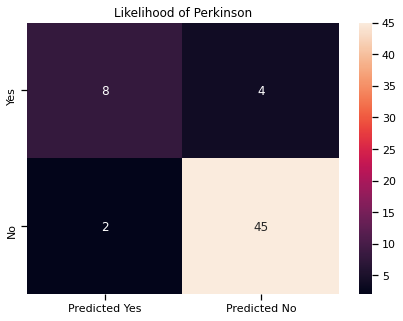

In [180]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics

print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, predicted_labels)

data_cm = pd.DataFrame(cm, index = [i for i in ["Yes","No"]],
                  columns = [i for i in ["Predicted Yes","Predicted No"]])
plt.figure(figsize = (7,5))
plt.title("Likelihood of Perkinson")
sns.heatmap(data_cm, annot=True)

In [181]:
cr=classification_report(y_test, predicted_labels, digits=2)
print(cr)

              precision    recall  f1-score   support

           0       0.80      0.67      0.73        12
           1       0.92      0.96      0.94        47

    accuracy                           0.90        59
   macro avg       0.86      0.81      0.83        59
weighted avg       0.89      0.90      0.89        59



In [182]:
#determining false positive rate and True positive rate, threshold
fpr, tpr, threshold = metrics.roc_curve(y_test, prediction_labels)
roc_auc_stack = metrics.auc(fpr, tpr)
# print AUC
print("AUC : % 1.4f" %(roc_auc_stack)) 

AUC :  0.8121


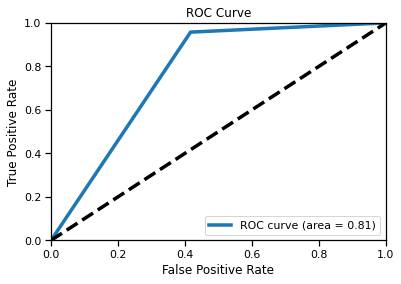

In [198]:
# Plot the ROC
import pylab as pl

# Plot ROC curve
pl.clf()
pl.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc_stack)
#pl.plot(fpr2, tpr2, label='ROC curve for Naive Bayes model (area = %0.2f)' % roc_auc2)
#pl.plot(fpr3, tpr3, label='ROC curve for LR model (area = %0.2f)' % roc_auc3)
pl.plot([0, 1], [0, 1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('ROC Curve')
pl.legend(loc="lower right")
pl.show()

### Model Performance (Stacking)

* Accuracy - 90% 

* Re-call - 96%

* Precision - 92%

* F1-Score - 94%

* AUC - 81%

Since there is class imbalance in this case (i.e target variable is 75% to 25%), F1-Score F1-score is a better metric to evaluate model.

## Standard Ensemble Model

### Random Forest Model


In [172]:
from sklearn.ensemble import RandomForestClassifier
#creating model of Random Forest
RandomForest = RandomForestClassifier(n_estimators = 100,criterion='entropy',max_features=10)
RandomForest = RandomForest.fit(scaler_x_train, y_train)

# predict the response
predicted_labels_rf = RandomForest.predict(scaler_x_test)

Confusion Matrix


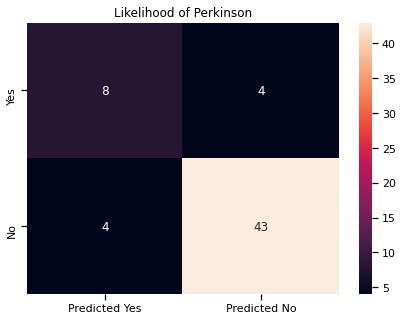

In [173]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics

print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, predicted_labels_rf)

data_cm = pd.DataFrame(cm, index = [i for i in ["Yes","No"]],
                  columns = [i for i in ["Predicted Yes","Predicted No"]])
plt.figure(figsize = (7,5))
plt.title("Likelihood of Perkinson")
sns.heatmap(data_cm, annot=True)

In [174]:
cr=classification_report(y_test, predicted_labels_rf, digits=2)
print(cr)

              precision    recall  f1-score   support

           0       0.67      0.67      0.67        12
           1       0.91      0.91      0.91        47

    accuracy                           0.86        59
   macro avg       0.79      0.79      0.79        59
weighted avg       0.86      0.86      0.86        59



In [176]:
#determining false positive rate and True positive rate, threshold
fpr, tpr, threshold = metrics.roc_curve(y_test, predicted_labels_rf)
roc_auc_rf = metrics.auc(fpr, tpr)
# print AUC
print("AUC : % 1.4f" %(roc_auc_rf)) 

AUC :  0.7908


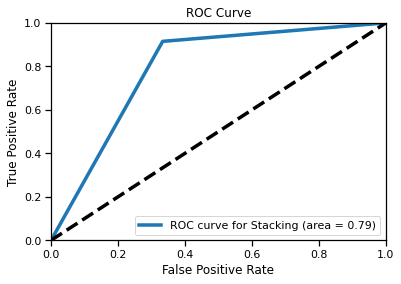

In [178]:
# Plot the ROC
import pylab as pl

# Plot ROC curve
pl.clf()
pl.plot(fpr, tpr, label='ROC curve for Stacking (area = %0.2f)' % roc_auc_rf)
#pl.plot(fpr2, tpr2, label='ROC curve for Naive Bayes model (area = %0.2f)' % roc_auc2)
#pl.plot(fpr3, tpr3, label='ROC curve for LR model (area = %0.2f)' % roc_auc3)
pl.plot([0, 1], [0, 1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('ROC Curve')
pl.legend(loc="lower right")
pl.show()

### Model Performance (Random Forest)

* Accuracy - 86% 

* Re-call - 91%

* Precision - 91%

* F1-Score - 91%

* AUC - 79%

Since there is class imbalance in this case (i.e target variable is 75% to 25%), F1-Score F1-score is a better metric to evaluate model.

Text(0, 0.5, 'Features')

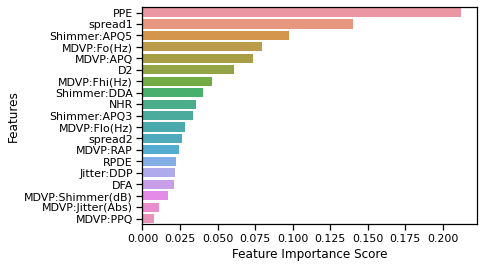

In [185]:
feature_imp = pd.Series(RandomForest.feature_importances_,index=X_train.columns).sort_values(ascending=False)
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')

## Adaptive Boosting 

In [188]:
from sklearn.ensemble import AdaBoostClassifier
#create and fit the model
Adab = AdaBoostClassifier( n_estimators= 50)
Adab  = AdBs.fit(scaler_x_train, y_train)

# predict the response
predicted_labels_ad = Adab.predict(scaler_x_test)

Confusion Matrix


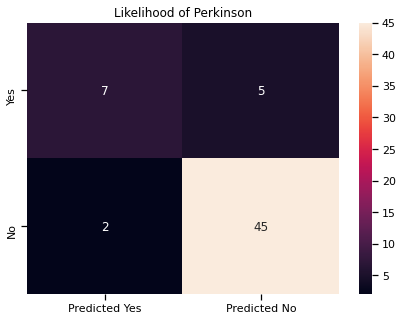

In [189]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics

print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, predicted_labels_ad)

data_cm = pd.DataFrame(cm, index = [i for i in ["Yes","No"]],
                  columns = [i for i in ["Predicted Yes","Predicted No"]])
plt.figure(figsize = (7,5))
plt.title("Likelihood of Perkinson")
sns.heatmap(data_cm, annot=True)

In [191]:
cr=classification_report(y_test, predicted_labels_ad, digits=2)
print(cr)

              precision    recall  f1-score   support

           0       0.78      0.58      0.67        12
           1       0.90      0.96      0.93        47

    accuracy                           0.88        59
   macro avg       0.84      0.77      0.80        59
weighted avg       0.88      0.88      0.87        59



In [192]:
#determining false positive rate and True positive rate, threshold
fpr, tpr, threshold = metrics.roc_curve(y_test, predicted_labels_ad)
roc_auc_ad = metrics.auc(fpr, tpr)
# print AUC
print("AUC : % 1.4f" %(roc_auc_ad)) 

AUC :  0.7704


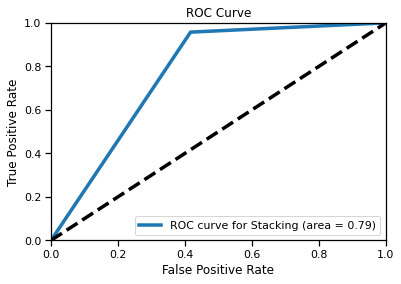

In [193]:
# Plot the ROC
import pylab as pl

# Plot ROC curve
pl.clf()
pl.plot(fpr, tpr, label='ROC curve for Stacking (area = %0.2f)' % roc_auc_rf)
#pl.plot(fpr2, tpr2, label='ROC curve for Naive Bayes model (area = %0.2f)' % roc_auc2)
#pl.plot(fpr3, tpr3, label='ROC curve for LR model (area = %0.2f)' % roc_auc3)
pl.plot([0, 1], [0, 1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('ROC Curve')
pl.legend(loc="lower right")
pl.show()

### Model Performance (Adaptive-boosting)

* Accuracy - 88% 

* Re-call - 96%

* Precision - 90%

* F1-Score - 93%

* AUC - 77%

Since there is class imbalance in this case (i.e target variable is 75% to 25%), F1-Score F1-score is a better metric to evaluate model.

## Comparing all the models for the performance 

In [195]:
from sklearn import model_selection
#Using K fold to check how my algorighm varies throughout my data if we split it in 10 equal bins
models = []
models.append(('Logistic Regression', LogisticRegression()))
models.append(('K-NN', KNeighborsClassifier(n_neighbors = 29, weights = 'uniform', metric='euclidean')))
models.append(('SVM', SVC(gamma=0.05, C=3)))
models.append(('Stacking', StackingClassifier(estimators=level0, final_estimator=level1, cv=5)))
models.append(('Random Forest', RandomForestClassifier(n_estimators = 100,criterion='entropy',max_features=10)))
models.append(('Adaptive Boosting', AdaBoostClassifier( n_estimators= 50)))

# evaluate each model
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=101)
	cv_results = model_selection.cross_val_score(model, scaler_x_train, y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	print("Name = %s , Mean Accuracy = %f, SD Accuracy = %f" % (name, cv_results.mean(), cv_results.std()))

/Users/Alok/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
/Users/Alok/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
/Users/Alok/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
/Users/Alok/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a 

Name = Logistic Regression , Mean Accuracy = 0.853846, SD Accuracy = 0.079441
Name = K-NN , Mean Accuracy = 0.839011, SD Accuracy = 0.110467
Name = SVM , Mean Accuracy = 0.876374, SD Accuracy = 0.084524
Name = Stacking , Mean Accuracy = 0.868681, SD Accuracy = 0.075993


/Users/Alok/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


Name = Random Forest , Mean Accuracy = 0.912637, SD Accuracy = 0.069694


/Users/Alok/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


Name = Adaptive Boosting , Mean Accuracy = 0.890659, SD Accuracy = 0.065955


[Text(0, 0, 'Logistic Regression'),
 Text(0, 0, 'K-NN'),
 Text(0, 0, 'SVM'),
 Text(0, 0, 'Stacking'),
 Text(0, 0, 'Random Forest'),
 Text(0, 0, 'Adaptive Boosting')]

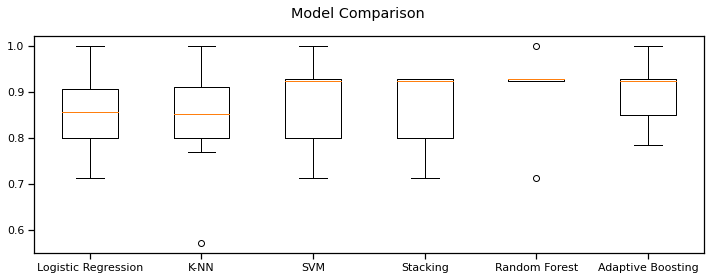

In [197]:
# boxplot algorithm comparison
fig = plt.figure(figsize=(12,4))
fig.suptitle('Model Comparison')
ax = fig.add_subplot()
plt.boxplot(results)
ax.set_xticklabels(names)

Above comparison shows that Random forest model performes better in terms of overall performance. The average accuracy of the model over data is above 90% and F1 score is around 94%